In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
!pip install catboost
import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.9 MB/s eta 0:00:00


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSets/PUBG_Game_Prediction_data.csv.zip')

In [ ]:
df.head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000,1,1,0,44,...,0,0.0000,0,0.00,0,0,34.70,1,0,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,...,0,0.0000,0,0.00,0,0,13.50,1,1497,0.0000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,0,2004.0000,0,0.00,0,0,1089.00,6,1500,0.7368
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.600,0,0,0,64,...,0,0.0000,0,0.00,0,0,799.90,4,0,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.270,0,0,0,74,...,0,0.0000,0,0.00,0,0,65.67,1,0,0.2143


In [ ]:
df.shape

(4446966, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [ ]:
df.isna().sum()

,0
Id,0
groupId,0
matchId,0
assists,0
boosts,0
damageDealt,0
DBNOs,0
headshotKills,0
heals,0
killPlace,0


In [ ]:
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [ ]:
df.drop(2744604,inplace=True)

**Understanding Players Distribution In A Game**

In [ ]:
df["players_joined"]=df.groupby('matchId')['matchId'].transform('count')

In [ ]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,players_joined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


**Analysing The Data**

Total Distance Travelled

In [ ]:
df['TotalDistance']=df['rideDistance']+df['walkDistance']+df['swimDistance']

Person Did Not Moved But Still Killed Other Players

In [ ]:
df['Kills Without Moving']=((df['kills']>0) & (df['TotalDistance']==0))

In [ ]:
df[df['Kills Without Moving']==True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,players_joined,TotalDistance,Kills Without Moving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [ ]:
df[df['Kills Without Moving']==True].shape

(1535, 32)

In [ ]:
df.drop(df[df['Kills Without Moving']==True].index,inplace=True)

Extra Ordinary Road Kills

In [ ]:
df[df['roadKills']>5].shape

(46, 32)

In [ ]:
df.drop(df[df['roadKills']>5].index,inplace=True)

How Many Kills??

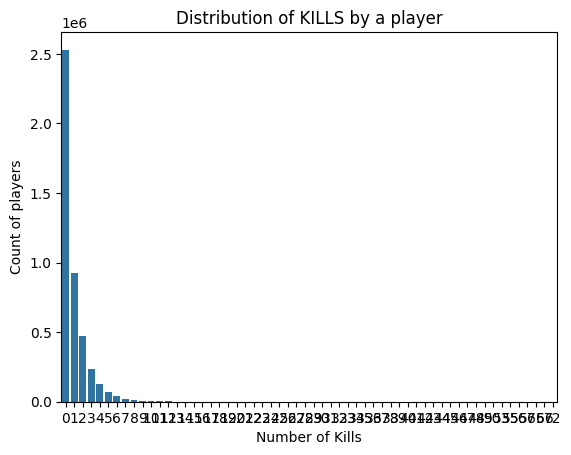

In [ ]:
sns.countplot(data = df, x = df['kills']).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show() ## more than 25lakh people do zero kills out of 44lakh

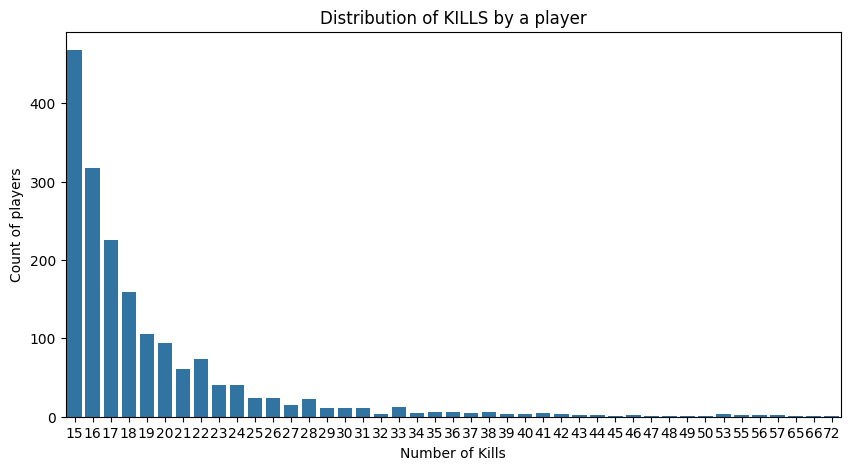

In [ ]:
kills = df[df['kills']>=15]['kills'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.barplot(x=kills.index, y=kills.values)
plt.title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()

In [ ]:
df[df['kills']>20].shape

(417, 32)

In [ ]:
df.drop(df[df['kills']>20].index,inplace=True)

Headshot??

In [ ]:
df['HeadShot_Rate']=df['headshotKills']/df['kills']
df['HeadShot_Rate']=df['HeadShot_Rate'].fillna(0)

<function matplotlib.pyplot.show(close=None, block=None)>

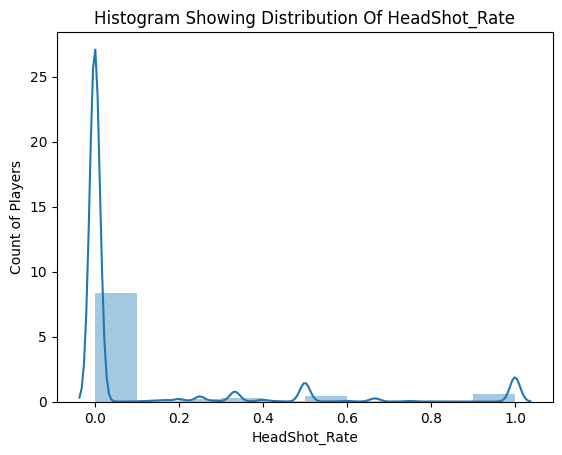

In [ ]:
sns.distplot(df['HeadShot_Rate'],bins=10).set_title("Histogram Showing Distribution Of HeadShot_Rate")
plt.ylabel("Count of Players")
plt.show

In [ ]:
df[(df['HeadShot_Rate']==1) & (df['kills']>5)].shape

(187, 33)

In [ ]:
df.drop(df[(df['HeadShot_Rate']==1) & (df['kills']>5)].index,inplace=True)

Longest kill

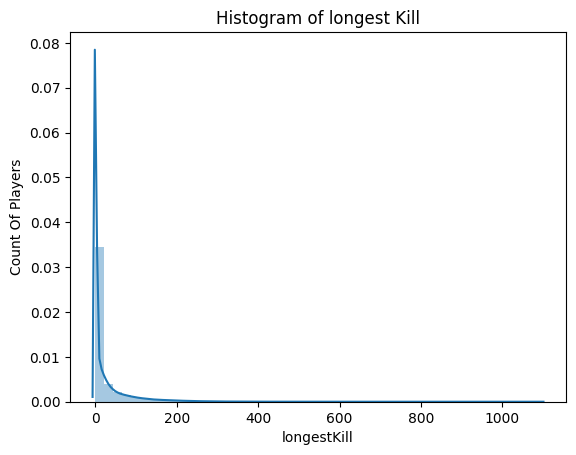

In [ ]:
sns.distplot(df['longestKill'],bins=50).set_title("Histogram of longest Kill")
plt.ylabel("Count Of Players")
plt.show()

In [ ]:
df[df['longestKill']>=500].shape

(1738, 33)

In [ ]:
df.drop(df[df['longestKill']>=500].index,inplace=True)

Weapons Acquired

<Axes: xlabel='weaponsAcquired', ylabel='Density'>

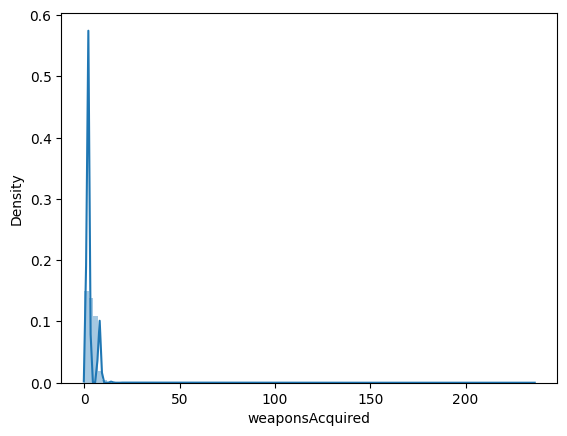

In [ ]:
sns.distplot(df['weaponsAcquired'],bins=100)

In [ ]:
df[df['weaponsAcquired']>=15].shape

(6809, 33)

In [ ]:
df.drop(df[df['weaponsAcquired']>=15].index,inplace=True)

**EDA**

In [ ]:
df.shape

(4436233, 33)

In [ ]:
df.isna().sum()

,0
Id,0
groupId,0
matchId,0
assists,0
boosts,0
damageDealt,0
DBNOs,0
headshotKills,0
heals,0
killPlace,0


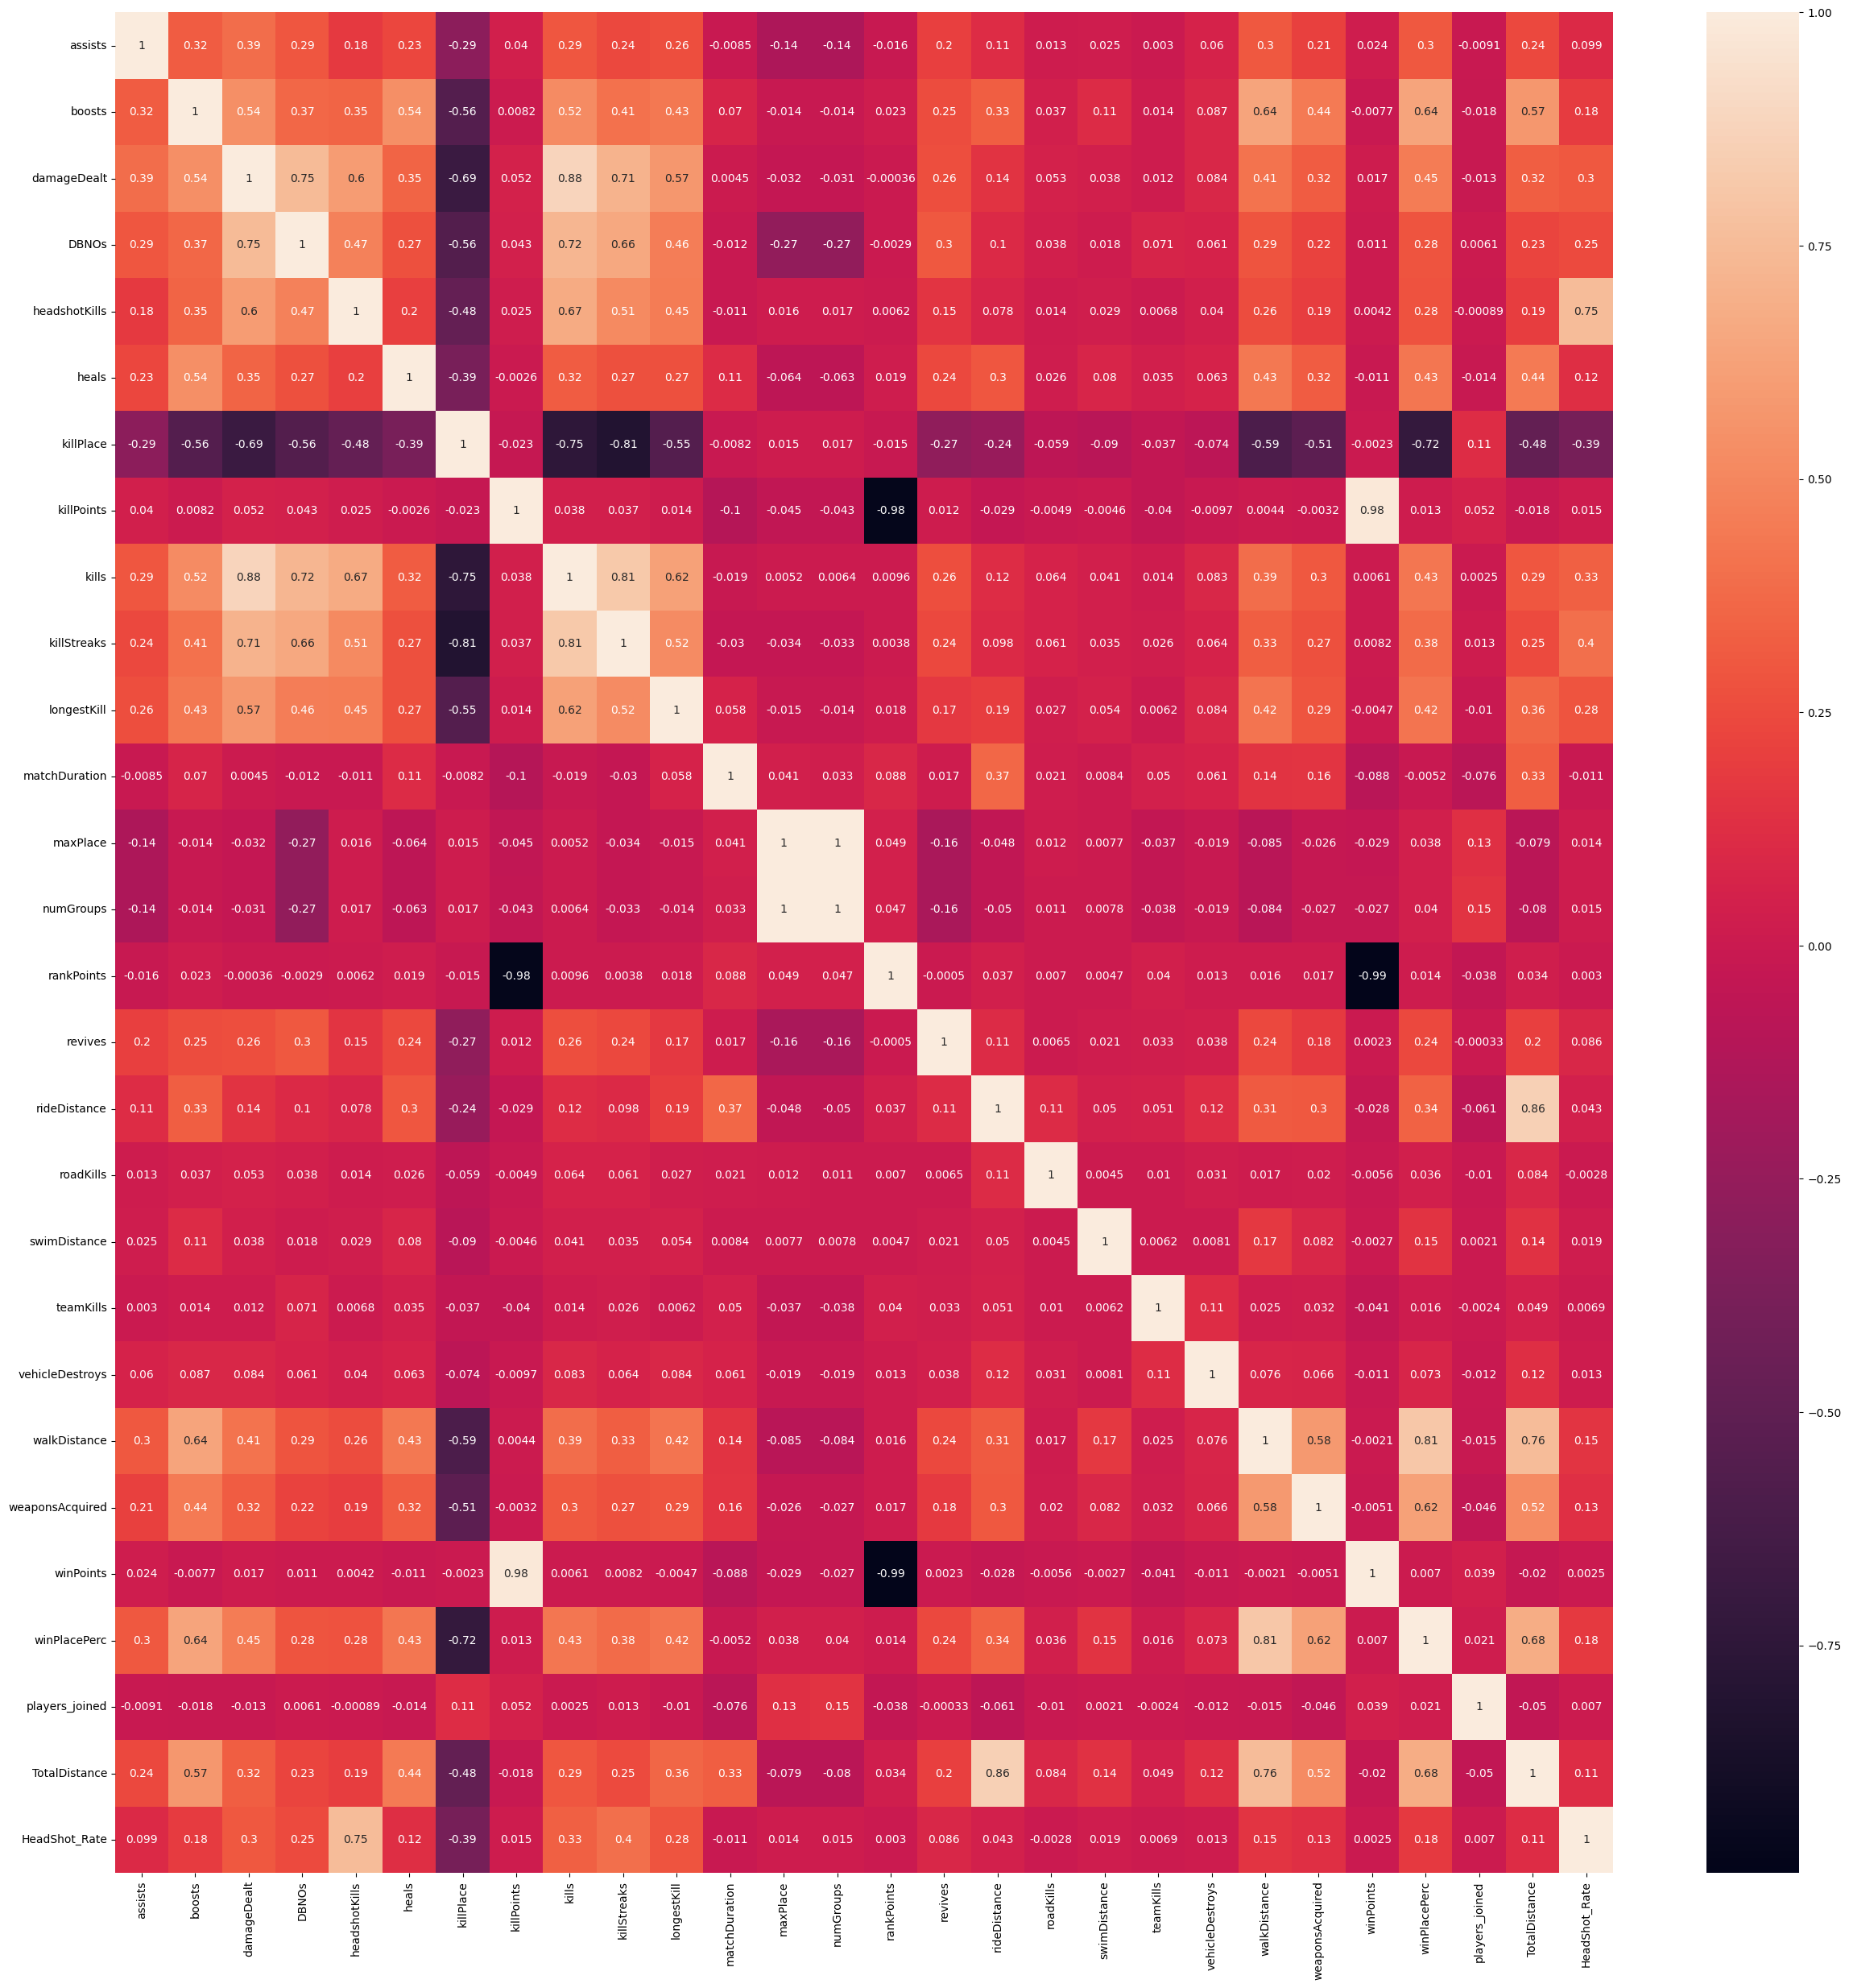

In [ ]:
plt.figure(figsize=[30,30])
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

**Feature Engineering**

In [ ]:
normalising_factor = (100 - df['players_joined']/100)+1

In [ ]:
df['killsNorm'] = df['kills'] * normalising_factor
df['damageDealtNorm'] = df['damageDealt'] * normalising_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalising_factor
df['matchDurationNorm'] = df['matchDuration'] * normalising_factor


df['traveldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df['healsnboosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [ ]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'players_joined',
       'TotalDistance', 'Kills Without Moving', 'HeadShot_Rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [ ]:
data = df.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance',
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration'])

In [ ]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,TotalDistance,Kills Without Moving,HeadShot_Rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0


Handel Categorical Data

In [ ]:
x = data.drop(['winPlacePerc'], axis = 1)
y = data['winPlacePerc']

In [ ]:
x = pd.get_dummies(x, columns=['matchType', 'Kills Without Moving'], drop_first=True)

In [ ]:
x.head(10)

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,60,1241,0,0.00,26,-1,0,0,...,False,False,False,False,False,False,False,False,False,True
1,0,0,57,0,0,0.00,25,1484,0,0,...,False,False,False,False,False,False,False,False,False,True
2,0,0,47,0,0,0.00,47,1491,0,0,...,False,False,False,False,False,False,False,False,False,False
3,0,0,75,0,0,0.00,30,1408,0,0,...,False,False,False,False,False,False,False,False,False,True
4,0,0,45,0,1,58.53,95,1560,0,0,...,False,False,False,False,False,False,False,True,False,False
5,1,1,44,0,1,18.44,28,1418,0,0,...,False,False,False,False,False,False,False,False,False,True
6,0,0,96,1262,0,0.00,28,-1,0,0,...,False,False,False,False,False,False,False,False,False,True
7,0,0,48,1000,0,0.00,92,-1,0,0,...,False,False,False,False,False,False,False,True,False,False
8,0,0,64,0,0,0.00,27,1493,0,0,...,False,False,False,False,False,False,False,False,True,False
9,0,0,74,0,0,0.00,27,1349,0,0,...,False,False,False,False,False,False,False,False,True,False


Modeling

In [ ]:
!pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.8/681.8 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0/120.0 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 14.8 MB/s eta 0:00:00


In [ ]:
!pip install catboost

In [ ]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

reg = LazyRegressor(regressors=[("LinearRegression", LinearRegression),("CatBoost", CatBoostRegressor),("DecisionTreeRegressor", DecisionTreeRegressor)])
models,predictions = reg.fit(x_train, x_test, y_train, y_test)

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


  0%|          | 0/3 [00:00<?, ?it/s]

Learning rate set to 0.148969
0:	learn: 0.2713820	total: 1.48s	remaining: 24m 35s
1:	learn: 0.2416221	total: 2.8s	remaining: 23m 17s
2:	learn: 0.2164943	total: 4s	remaining: 22m 9s
3:	learn: 0.1961683	total: 4.72s	remaining: 19m 35s
4:	learn: 0.1794761	total: 5.46s	remaining: 18m 6s
5:	learn: 0.1657185	total: 6.24s	remaining: 17m 13s
6:	learn: 0.1548297	total: 6.99s	remaining: 16m 31s
7:	learn: 0.1452380	total: 7.69s	remaining: 15m 53s
8:	learn: 0.1378498	total: 8.36s	remaining: 15m 20s
9:	learn: 0.1317316	total: 8.99s	remaining: 14m 49s
10:	learn: 0.1268096	total: 9.69s	remaining: 14m 30s
11:	learn: 0.1228520	total: 10.4s	remaining: 14m 19s
12:	learn: 0.1188808	total: 11.1s	remaining: 14m 5s
13:	learn: 0.1163126	total: 11.8s	remaining: 13m 48s
14:	learn: 0.1137557	total: 12.5s	remaining: 13m 38s
15:	learn: 0.1118797	total: 13.2s	remaining: 13m 29s
16:	learn: 0.1096322	total: 13.9s	remaining: 13m 22s
17:	learn: 0.1081901	total: 14.9s	remaining: 13m 31s
18:	learn: 0.1070010	total: 15.9s

In [ ]:
print(models)

                       Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                 
CatBoost                             0.93       0.93  0.08      729.51
DecisionTreeRegressor                0.85       0.85  0.12      139.32
LinearRegression                     0.80       0.80  0.14        9.61


Working with CatBoost

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

cat = cb.CatBoostRegressor(iterations=100,
                             learning_rate=0.1,
                             depth=10,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=20)

cat.fit(x_train, y_train,
          eval_set=(x_test, y_test),
          use_best_model=True,
          verbose=True)

y_pred_cat = cat.predict(x_test)

print('The rmse of prediction is:', mean_squared_error(y_test, y_pred_cat) ** 0.5)
print('The r2_score of prediction is:', r2_score(y_test, y_pred_cat))
print(y_pred_cat[:5])

0:	learn: 0.2815496	test: 0.2814716	best: 0.2814716 (0)	total: 1.88s	remaining: 3m 5s
50:	learn: 0.0868143	test: 0.0869315	best: 0.0869315 (50)	total: 1m 48s	remaining: 1m 44s
99:	learn: 0.0821990	test: 0.0823818	best: 0.0823818 (99)	total: 3m 31s	remaining: 0us

bestTest = 0.08238184985
bestIteration = 99

The rmse of prediction is: 0.08238185015590113
The r2_score of prediction is: 0.9280789386375873
[0.79123525 0.87771794 0.66529189 0.16187726 0.21815112]


In [ ]:
# Predict the winning chance for each player in the test set
predicted_win_chance = cat.predict(x_test)

# Find the index of the player with the highest predicted winning chance
max_win_chance_index = np.argmax(predicted_win_chance)

# Get the original data for this player from the test set
player_with_highest_win_chance = x_test.iloc[max_win_chance_index]

print("Player with the highest predicted winning chance:")
print(player_with_highest_win_chance)
print("\nPredicted winning chance:", predicted_win_chance[max_win_chance_index])

Player with the highest predicted winning chance:
DBNOs                                0
headshotKills                        1
killPlace                           12
killPoints                           0
killStreaks                          1
longestKill                     328.70
numGroups                           41
rankPoints                        1550
roadKills                            0
teamKills                            0
vehicleDestroys                      0
weaponsAcquired                      6
winPoints                            0
players_joined                      88
TotalDistance                  5824.00
HeadShot_Rate                     1.00
killsNorm                       100.12
damageDealtNorm               30476.53
maxPlaceNorm                   4605.52
matchDurationNorm            188926.44
traveldistance                 5824.00
healsnboosts                         7
assist                               4
matchType_crashtpp               False
matchType_duo 

This code first predicts the winning chance for each player in the test set using the trained CatBoost model. Then, it finds the index of the player with the highest predicted winning chance. Finally, it retrieves and prints the features of that player from the `x_test` DataFrame and their predicted winning chance.

The output will show the values of all the features for the player identified as having the highest predicted winning chance, followed by their predicted winning chance score. It will not include the player's original ID.